In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
#all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
#all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5563,00030384_000.png,No Finding,0,30384,027Y,M,PA,2021,2021,0.194311,0.194311
3475,00017137_008.png,Pneumothorax,8,17137,048Y,F,PA,2990,2991,0.143000,0.143000
2233,00011481_011.png,No Finding,11,11481,031Y,F,AP,2048,2500,0.168000,0.168000


In [ ]:
## EDA
# Todo 

In [5]:
all_xray_df.shape

(112120, 12)

In [3]:
sample_df.shape

(5606, 11)

### Ages

In [55]:
sample_df["Patient Age"]

0       060Y
1       057Y
2       077Y
3       079Y
4       055Y
        ... 
5601    058Y
5602    061Y
5603    052Y
5604    010Y
5605    024Y
Name: Patient Age, Length: 5606, dtype: object

In [54]:
list(map(lambda age: int(age[:3]), sample_df["Patient Age"]))[:10]

[60, 57, 77, 79, 55, 68, 71, 71, 77, 77]

In [56]:
def get_ages(df):
    return list(map(lambda age: int(age[:3]), df["Patient Age"]))

In [57]:
ages = get_ages(sample_df)

In [58]:
min(ages), max(ages)

(1, 411)

In [13]:
ages_over17 = list(filter(lambda age: (age > 17) and (age<100), ages))

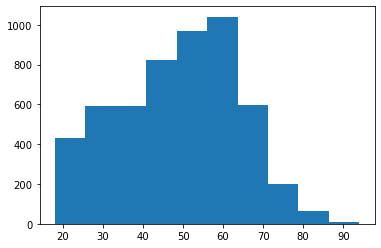

In [14]:
plt.hist(ages_over17, bins=10);

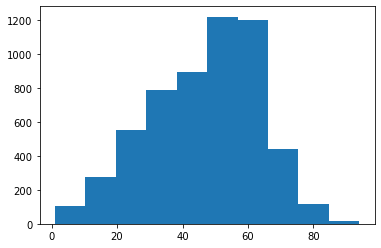

In [15]:
ages_over0 = list(filter(lambda age: (age > 0) and (age<100), ages))
plt.hist(ages_over0, bins=10);

In [67]:
def get_ages(df):
    ages = map(lambda age: int(age[:3]), df["Patient Age"])
    ages_real = list(filter(lambda age: age<120, ages))
    return ages_real

In [68]:
max(get_ages(sample_df))

94

### Number of unitque IDs in sample

Total number

In [18]:
len(sample_df["Patient ID"])

5606

Unique IDs

In [20]:
len(set(sample_df["Patient ID"]))

4230

### Patients with findings

In [23]:
sample_df["Finding Labels"].unique()

array(['Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Cardiomegaly|Emphysema', 'No Finding', 'Atelectasis',
       'Cardiomegaly|Edema|Effusion', 'Consolidation|Mass', 'Effusion',
       'Consolidation|Effusion|Infiltration|Nodule', 'Mass',
       'Mass|Pneumothorax', 'Cardiomegaly|Consolidation', 'Consolidation',
       'Pneumothorax', 'Consolidation|Pleural_Thickening',
       'Infiltration|Nodule', 'Fibrosis', 'Infiltration', 'Emphysema',
       'Atelectasis|Infiltration|Mass|Pleural_Thickening',
       'Emphysema|Mass', 'Emphysema|Pneumothorax',
       'Emphysema|Infiltration', 'Consolidation|Effusion|Infiltration',
       'Consolidation|Fibrosis', 'Fibrosis|Pleural_Thickening',
       'Effusion|Infiltration', 'Nodule', 'Mass|Pleural_Thickening',
       'Infiltration|Pleural_Thickening', 'Pleural_Thickening',
       'Consolidation|Infiltration|Pneumothorax', 'Cardiomegaly|Effusion',
       'Atelectasis|Consolidation|Effusion', 'Fibrosis|Infiltration',
       'Ate

In [29]:
# Merge all array into a single string, with findings separated by |
findings_bar = "|".join(sample_df["Finding Labels"].unique())
findings_bar[:500]

'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax|Cardiomegaly|Emphysema|No Finding|Atelectasis|Cardiomegaly|Edema|Effusion|Consolidation|Mass|Effusion|Consolidation|Effusion|Infiltration|Nodule|Mass|Mass|Pneumothorax|Cardiomegaly|Consolidation|Consolidation|Pneumothorax|Consolidation|Pleural_Thickening|Infiltration|Nodule|Fibrosis|Infiltration|Emphysema|Atelectasis|Infiltration|Mass|Pleural_Thickening|Emphysema|Mass|Emphysema|Pneumothorax|Emphysema|Infiltration|Consolidation|Effusion|Infil'

Set of unique findings

In [30]:
findings_set = set(findings_bar.split('|'))
findings_set

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

a

In [36]:
sample_df["Finding Labels"][0]

'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax'

In [35]:
sample_df["Finding Labels"][0].split('|')

['Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax']

In [38]:
sample_df["Finding Labels"].apply(lambda x: x.split('|'))

0       [Emphysema, Infiltration, Pleural_Thickening, ...
1                               [Cardiomegaly, Emphysema]
2                                            [No Finding]
3                                           [Atelectasis]
4                         [Cardiomegaly, Edema, Effusion]
                              ...                        
5601                                         [No Finding]
5602                  [Cardiomegaly, Effusion, Emphysema]
5603                                       [Infiltration]
5604                                         [No Finding]
5605                                         [No Finding]
Name: Finding Labels, Length: 5606, dtype: object

In [40]:
sample_df["Finding Labels"].apply(lambda x: 'Emphysema' in x.split('|'))

0        True
1        True
2       False
3       False
4       False
        ...  
5601    False
5602     True
5603    False
5604    False
5605    False
Name: Finding Labels, Length: 5606, dtype: bool

In [42]:
for finding in findings_set:
    print('\n###  ', finding, '  ###')
    print(sample_df["Finding Labels"].apply(lambda x: finding in x.split('|')))


###   Infiltration   ###
0        True
1       False
2       False
3       False
4       False
        ...  
5601    False
5602    False
5603     True
5604    False
5605    False
Name: Finding Labels, Length: 5606, dtype: bool

###   Pneumothorax   ###
0        True
1       False
2       False
3       False
4       False
        ...  
5601    False
5602    False
5603    False
5604    False
5605    False
Name: Finding Labels, Length: 5606, dtype: bool

###   Consolidation   ###
0       False
1       False
2       False
3       False
4       False
        ...  
5601    False
5602    False
5603    False
5604    False
5605    False
Name: Finding Labels, Length: 5606, dtype: bool

###   Emphysema   ###
0        True
1        True
2       False
3       False
4       False
        ...  
5601    False
5602     True
5603    False
5604    False
5605    False
Name: Finding Labels, Length: 5606, dtype: bool

###   Cardiomegaly   ###
0       False
1        True
2       False
3       False
4       

In [44]:
for finding in findings_set:
    sample_df[finding] = sample_df["Finding Labels"].apply(lambda x: finding in x.split('|'))

In [45]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Fibrosis,Pneumonia,Edema,No Finding,Effusion,Mass,Atelectasis,Hernia,Pleural_Thickening,Nodule
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,False,False,False,False,False,False,False,False,True,False
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,False,False,False,False,False,False,False,False,False,False
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,False,False,False,True,False,False,False,False,False,False
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,False,False,False,False,False,False,True,False,False,False
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,False,False,True,False,True,False,False,False,False,False


In [60]:
ages_pneumonia = get_ages(sample_df[sample_df["Pneumonia"]])

In [61]:
len(ages_pneumonia), min(ages_pneumonia), max(ages_pneumonia)

(62, 5, 76)

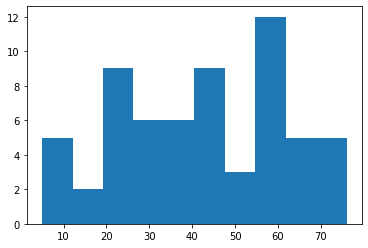

In [62]:
plt.hist(ages_pneumonia, bins=10);

In [ ]:
ages_over17 = list(filter(lambda age: (age > 17) and (age<100), ages))

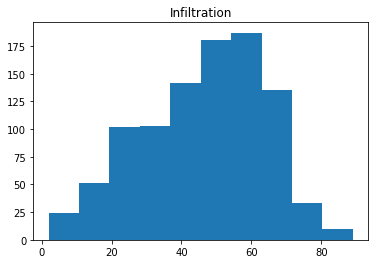

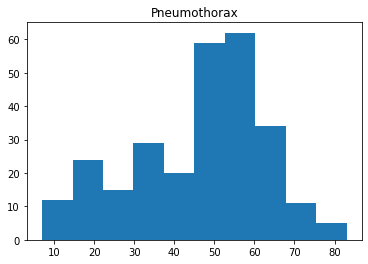

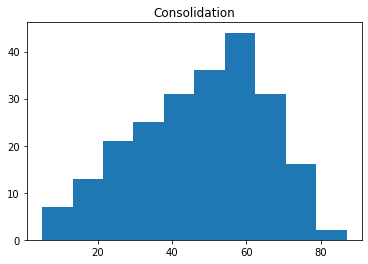

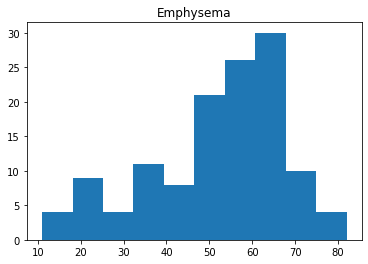

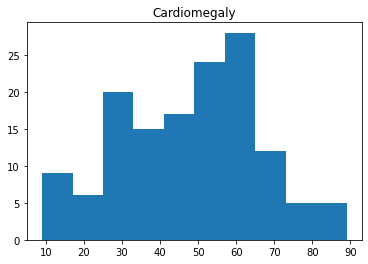

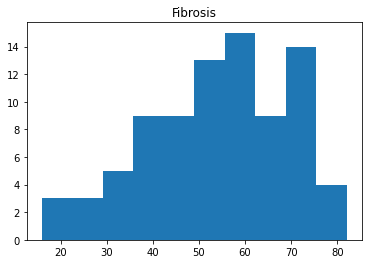

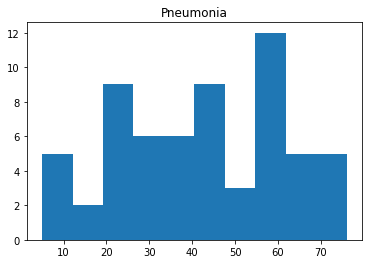

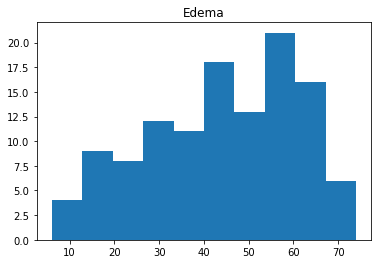

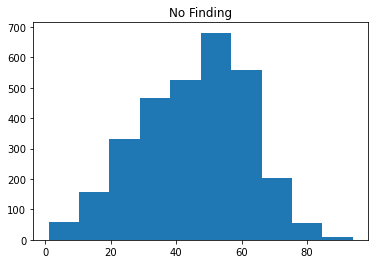

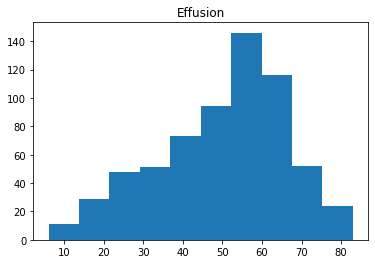

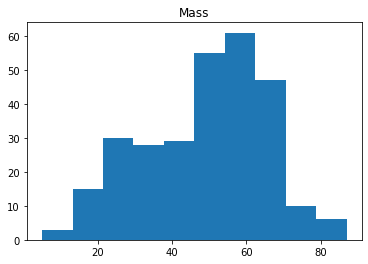

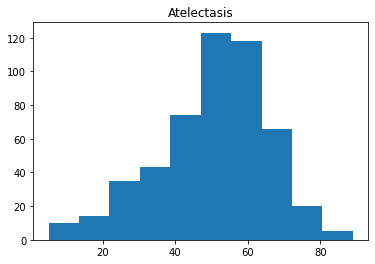

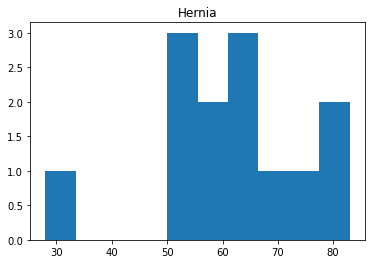

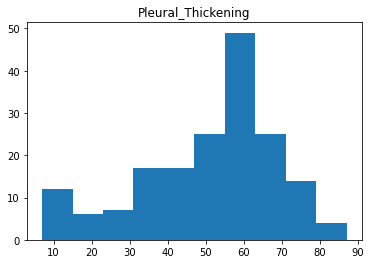

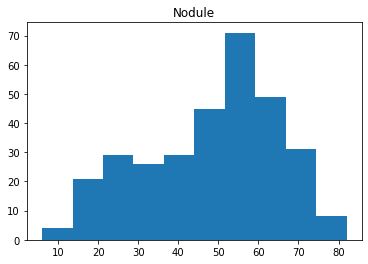

In [69]:
for finding in findings_set:
    ages_finding = get_ages(sample_df[sample_df[finding]])
    plt.figure();
    plt.hist(ages_finding, bins=10);
    plt.title(finding)

## Images

### Get paths

In [80]:
get_imgpath = {os.path.basename(x): x for x in glob(os.path.join('/data','images*', '*', '*.png'))}

In [85]:
sample_df["Image Index"].apply(lambda x: get_imgpath[x])

0       /data/images_001/images/00000013_005.png
1       /data/images_001/images/00000013_026.png
2       /data/images_001/images/00000017_001.png
3       /data/images_001/images/00000030_001.png
4       /data/images_001/images/00000032_001.png
                          ...                   
5601    /data/images_012/images/00030712_000.png
5602    /data/images_012/images/00030786_005.png
5603    /data/images_012/images/00030789_000.png
5604    /data/images_012/images/00030792_000.png
5605    /data/images_012/images/00030797_000.png
Name: Image Index, Length: 5606, dtype: object

In [86]:
sample_df["Image Path"] = sample_df["Image Index"].apply(lambda x: get_imgpath[x])

In [87]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Pneumonia,Edema,No Finding,Effusion,Mass,Atelectasis,Hernia,Pleural_Thickening,Nodule,Image Path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,False,False,False,False,False,False,False,True,False,/data/images_001/images/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,False,False,False,False,False,False,False,False,False,/data/images_001/images/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,False,False,True,False,False,False,False,False,False,/data/images_001/images/00000017_001.png
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,False,False,False,False,False,True,False,False,False,/data/images_001/images/00000030_001.png
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,False,True,False,True,False,False,False,False,False,/data/images_001/images/00000032_001.png


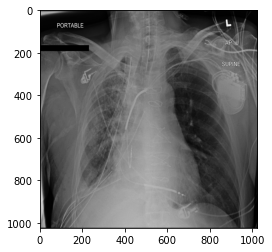

In [88]:
im = plt.imread(sample_df["Image Path"][0])
plt.imshow(im, 'gray');

### Conditional images

Pneumonia

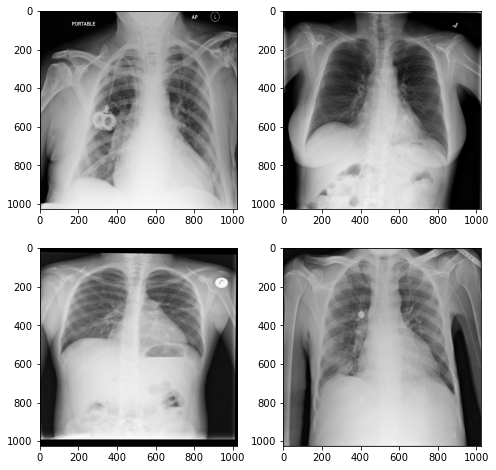

In [97]:
finding = "Pneumonia"

plt.figure(figsize=(8, 8))
for i, path in enumerate(sample_df[sample_df[finding]]["Image Path"][:4]):
    im = plt.imread(path)
    plt.subplot(2, 2, i+1)
    plt.imshow(im, 'gray');

No finding

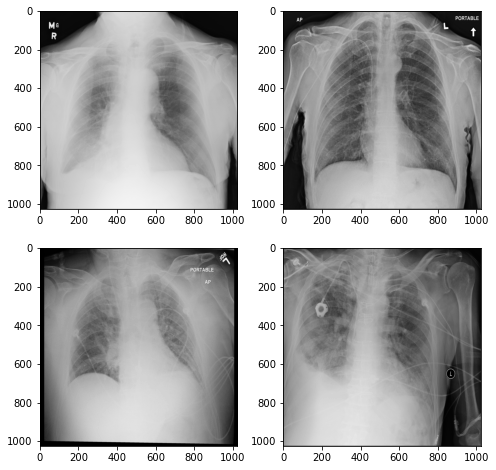

In [98]:
finding = "No Finding"

plt.figure(figsize=(8, 8))
for i, path in enumerate(sample_df[sample_df[finding]]["Image Path"][:4]):
    im = plt.imread(path)
    plt.subplot(2, 2, i+1)
    plt.imshow(im, 'gray');

### View positions

In [99]:
sample_df["View Position"].unique()

array(['AP', 'PA'], dtype=object)

In [103]:
len(sample_df[sample_df["View Position"] == "AP"]), len(sample_df[sample_df["View Position"] == "PA"])

(2213, 3393)

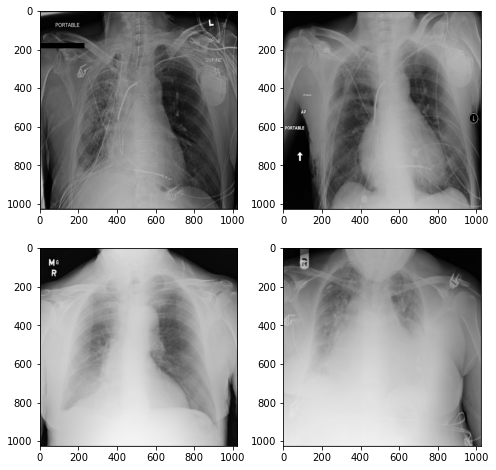

In [100]:
position = "AP"

plt.figure(figsize=(8, 8))
for i, path in enumerate(sample_df[sample_df["View Position"] == position]["Image Path"][:4]):
    im = plt.imread(path)
    plt.subplot(2, 2, i+1)
    plt.imshow(im, 'gray');

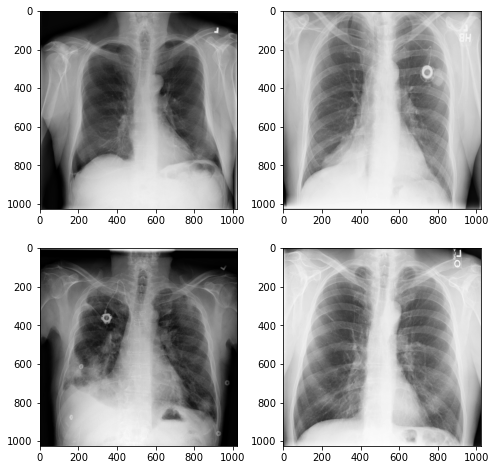

In [101]:
position = "PA"

plt.figure(figsize=(8, 8))
for i, path in enumerate(sample_df[sample_df["View Position"] == position]["Image Path"][:4]):
    im = plt.imread(path)
    plt.subplot(2, 2, i+1)
    plt.imshow(im, 'gray');